<a href="https://colab.research.google.com/github/ErabellySreeja2005/23CSBTB27-28/blob/main/knn_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [ ]:
raw_data = pd.read_csv('Classified_Data.txt')

In [ ]:
raw_data = pd.read_csv('Classified_Data.txt', index_col = 0)

In [ ]:
print(raw_data.columns)

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))

In [ ]:
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = scaled_data

y = raw_data['TARGET CLASS']

In [ ]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
predictions = model.predict(x_test_data)

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       144
           1       0.90      0.92      0.91       156

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [ ]:
print(confusion_matrix(y_test_data, predictions))

[[128  16]
 [ 12 144]]


In [ ]:
error_rates = []

In [ ]:
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))

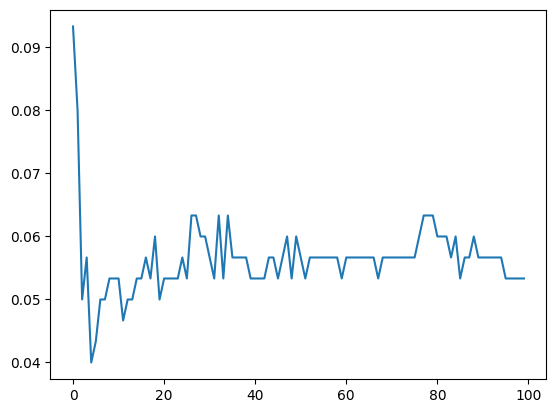

In [ ]:
plt.plot(error_rates)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       157
           1       0.88      0.90      0.89       143

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

[[139  18]
 [ 14 129]]


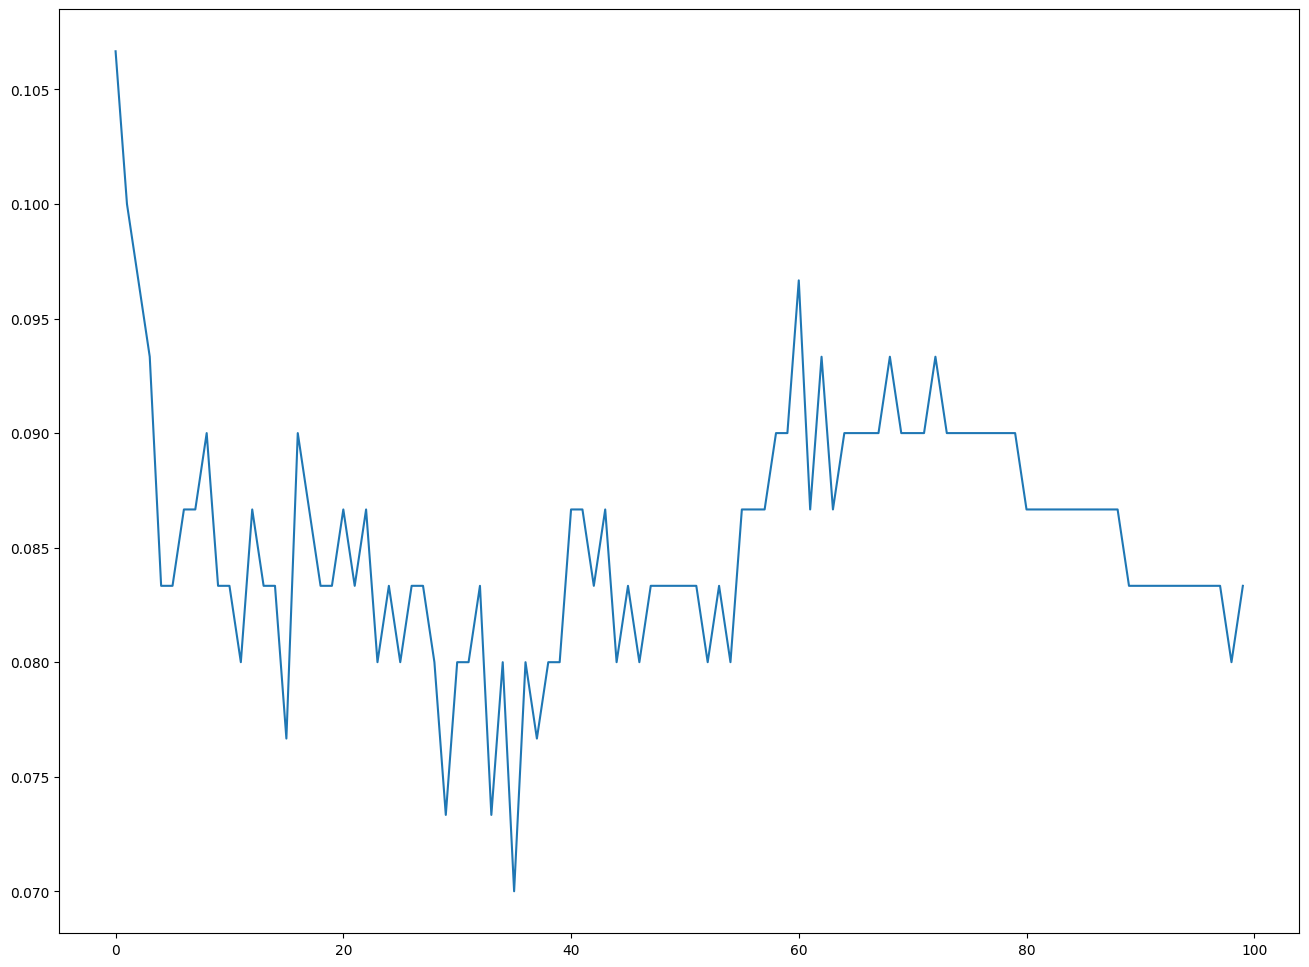

In [29]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

#Import the data set

raw_data = pd.read_csv('Classified_Data.txt', index_col = 0)

#Import standardization functions from scikit-learn

from sklearn.preprocessing import StandardScaler

#Standardize the data set

scaler = StandardScaler()

scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))

scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

#Split the data set into training data and test data

from sklearn.model_selection import train_test_split

x = scaled_data

y = raw_data['TARGET CLASS']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

#Train the model and make predictions

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

#Performance measurement

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test_data, predictions))

print(confusion_matrix(y_test_data, predictions))

#Selecting an optimal K value

error_rates = []

for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))

plt.figure(figsize=(16,12))
plt.plot(error_rates)